<h1>Detekcija srčanih bolesti</h1>

U sklopu predmeta "Uvod u znanost o podacima" napravio sam model za detekciju srčanih bolesti.
Rad se temelji na objavljenom istraživanju: "Implementation of Machine Learning Model to Predict Heart Failure Disease, u sklopu članka - "(IJACSA) International Journal of Advanced Computer Science and Applications, Vol. 10, No. 6, 2019"

Prema istraživanju kardiovaskularne bolesti su jedne od najčešćih bolesti koje mogu utjecati na zdravlje ljudi. Svake godine 26 milijona ljudi je pod utjecajem srčanih bolesti među kojima neki od njih rezultiraju zastojem srca.

Osobe koje su pod velikim kardiovaskularnim rizikom zbog prisutnosti određenih pojava poput hipertenzije, dijabetesa i ostalih povezanih simptoma bi trebali preventivno detektirati mogućnost realizacije rizika te u tom kontekstu modeli strojnog učenja mogu biti od velike pomoći.



<h2>Deskriptivna i istraživačka analiza podataka</h2>

Liječnički podaci i istraživanja ukazuju kako na kardiovaskularno zdravlje najviše utječu životne navike; od nezdrave hrane i pušenja do fizičke aktivnosti te stresa.
Kako bi se replicirali podaci istraživanja, na raspolaganju imamo "heart_disease_uci" skup podataka s primjerima, atributima te oznakama srčanih bolesti.

Idemo se upoznati sa skupom podataka, no prije toga moramo učitati sve potrebne biblioteke i okvire.

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



<h3> Učitavanje podataka</h3>

In [30]:
X = pd.read_csv("heart_disease_uci.csv", index_col = 0)
X

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2


Vidimo da tablica ima 920 primjera s 15 atributa među kojima je "num" ciljna oznaka.

Pojašnjenja značajki:
 - num - ciljana značajka - ciljna oznaka koja govori o razini srčanih bolesti
 - thal - "Thallium test" - kategoričke vrijednosti boli u prsima ili poteškoća s disanjem 
 - ca - status fluoroskopije (Coronary Angiography) - vrsta medicinskog slikanja koja pokazuje koliko arterija prilikom procedure "farbanja" opsrkbljuju srce krvlju.
 - slope - kategorička varijabla koja na temelju ECG mjerenja pokazuje srčano stanje pacijenta za vrijeme fizičke aktivnosti 
 - oldpeak - ST dio elektrokardijagrama (EEG) koji ukazuje ima li smanjenja dotoka krvi u srce za vrijeme fizičke aktivnosti
 - exang - bol u prsima (angina) koja je nastala kao posljedica fizičke aktivnosti (True ako je, false ako nije)
 - thalch - ?
 - restecg - kategorička varijabla koja pokazuje rezultat srčanih abnormalija uz pomoć EKG-a za vrijeme mirovanja
 - fbs - razina šećera u krvi nakon prespavane noći na praznom želudcu. Ako je razina veća od 120mg/dl vrijednost je True, što sugerira hiperglikemiju (znak za dijabetes), inače False
 - chol - mjerenje kolesterola za vrijeme primanja pacijenta u bolnicu
 - trestbps - mjerenje krvnog tlaka za vrijeme primanja pacijenta u bolnicu
 - cp - kategorička varijabla koja gleda razinu inteziteta boli u prsima (angine) za vrijeme primanja pacijenta u bolnicu
 - dataset - ?
 - sex - spol pacijenta [Male, Female]
 - age - godina pacijenta


In [31]:
X.describe(include="all")

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,309.000000,434,920.000000
unique,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,726,304,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN,196,NaN
mean,53.510870,NaN,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.676375,NaN,0.995652
std,9.424685,NaN,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.935653,NaN,1.142693
min,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,47.000000,NaN,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,60.000000,NaN,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000,NaN,2.000000


Iz ovoga možemo koji su atributi binarne i kategoričke varijable kao i numeričke. 
Možemo primjetiti sljedeće:

- Nedostaju mjerenja sljedećih 7 atributa: krvnog tlaka (trestbps), razina šećera u krvi natašte (fbs), angina vježbanja (exang), oldpeak, slope, ca, thal
- Maksimalna vrijednost za kolesterol je 603, dok je u istraživanju navedena maksimalna vrijednost 564, stoga to upućuje na stršeću vrijednosti
- Oldpeak ima minimalnu vrijednost manju od nule, što sugerira na grešku u mjerenju

Kako bismo bolje uočili anomalije u podacima te ih pripremili za modele, odradit ćemo čišćenje i vizualizaciju.


<h3>Vizualizacija podataka</h3>

<h4>Odnosi između numeričkih atributa<h4>

Idemo vidjeti kakvi su međusobno odnosi između atributa. Vizualizacija nam može pomoći u boljem razumijevanju skupa podataka te pronalasku nedostajučih i stršećih vrijednosti.

In [63]:
X.dtypes

age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

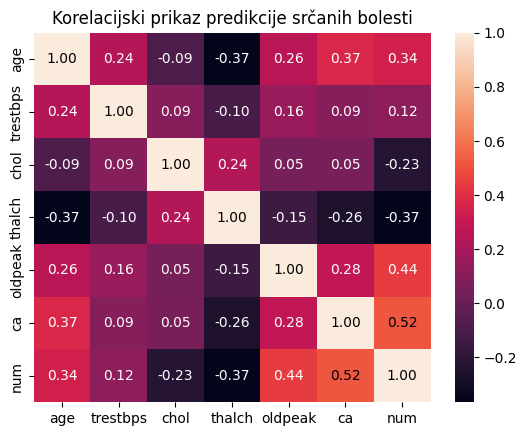

In [110]:
object_columns = X.select_dtypes("object").columns
X_numeric = X.loc[:, ~X.columns.isin(object_columns)]
correlation_matrix = X_numeric.corr()
sns.heatmap(X_numeric.corr(), annot=False)

def get_text_color(value, threshold=0.5):
    if abs(value) > threshold:
        return 'black'
    else:
        return 'white'

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        value = correlation_matrix.iloc[i, j]
        text_color = get_text_color(value)
        plt.text(j + 0.5, i + 0.5, f'{value:.2f}', ha='center', va='center', color=text_color)
        
plt.title("Korelacijski prikaz predikcije srčanih bolesti")
plt.show()

Korelacija je mjera jakosti linearne veze između dviju varijabli. U našem slučaju, predikcija srčanih bolesti, num atribut, ima srednje pozitivnu linearnu vezu s koronarnom angiografijom (ca) čiji je koeficijent korelacije 0.52 te s oldpeak-om gdje je koeficijent 0.44. To su ujedno najveći koeficijenti korelaciji među svim atributima.
Također, srčane bolesti imaju donekle negativnu korelaciju s maksimalnim otkucajem srca te kolesterolom.

<h4>Odnosi između kategoričkih atributa<h4>

Obzirom da postoji slaba pozitivna korelacija između srčanih bolesti te godina pacijenta, idemo vidjeti ima li razlike između spolova

In [130]:
X_tmp_good = X.loc[X.num == 0].groupby("sex").count().loc[:, "age"].values
X_tmp_bad = X.loc[X.num > 0].groupby("sex").count().loc[:, "age"].values
spol = X.groupby("sex").count().index.values


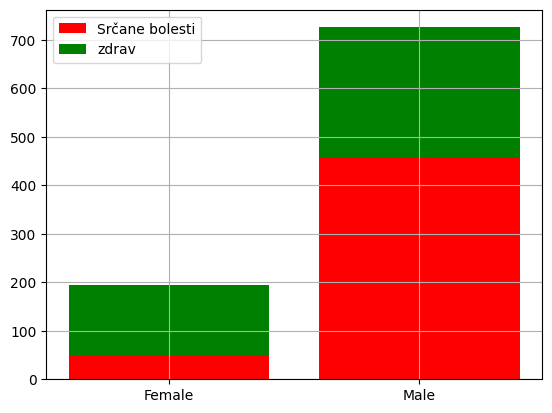

In [131]:
plt.bar(spol, X_tmp_bad, color='red', label='Srčane bolesti')
plt.bar(spol, X_tmp_good, color='green', label='zdrav', bottom=X_tmp_bad)
plt.legend(loc='best')
plt.grid()
plt.show()

U našem skupu podataka nalazi se 78.9% muškaraca i 21% žena. Od toga 63% muškaraca ima neku razinu srčanih bolesti, dok kod žena ima znatno manje, njih 25%.


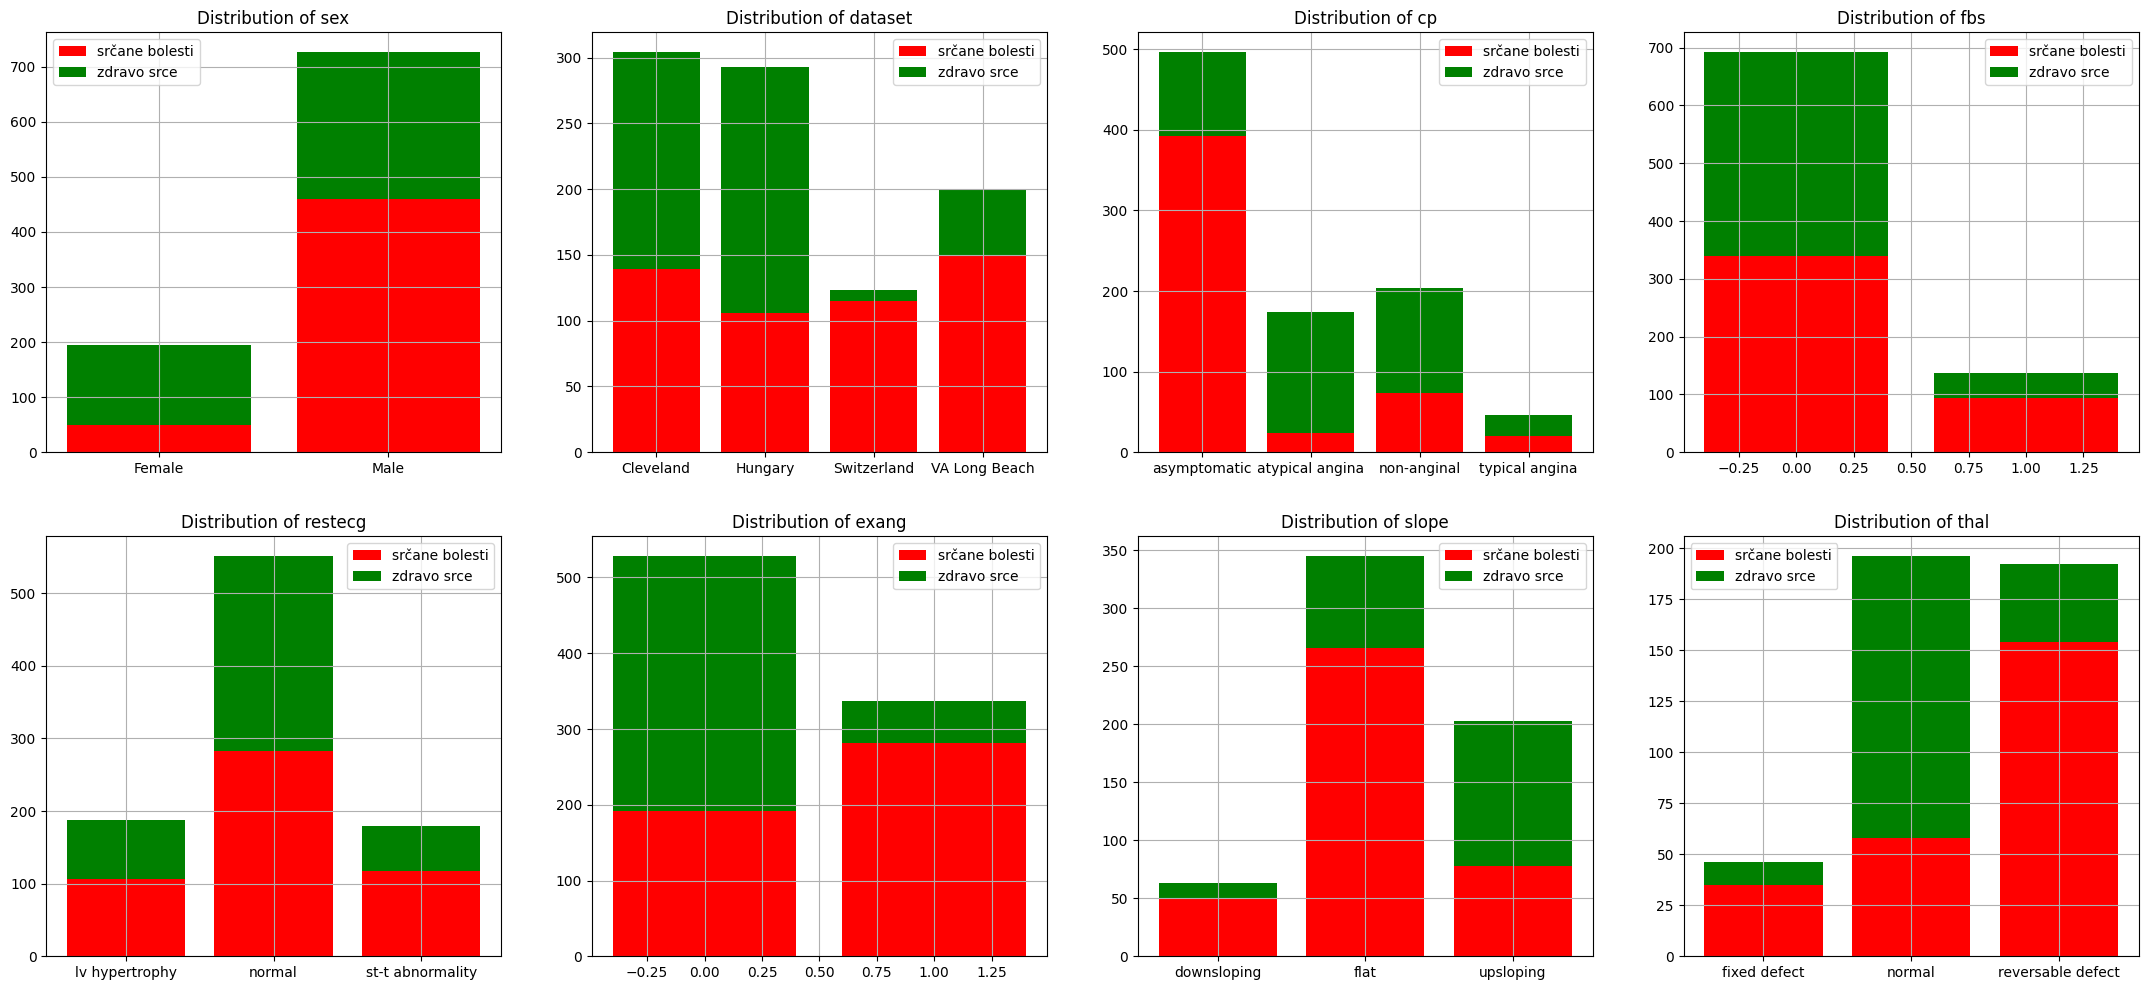

In [274]:
X_categoric = X.loc[:, X.columns.isin(object_columns)]
fig, ax = plt.subplots(2, 4, figsize=(27, 12))
k = 0
for i in range(2):
    for j in range(4):
        column_name = X_categoric.columns[k]

        X_tmp_good = X.loc[X.num == 0].groupby(column_name).count().loc[:, "age"].values
        X_tmp_bad = X.loc[X.num > 0].groupby(column_name).count().loc[:, "age"].values
        spol = X.groupby(column_name).count().index.values
        
        category_values = X_categoric[column_name].value_counts()
        if column_name == "fbs" or column_name == "exang":
            category_values = X_categoric[column_name].value_counts()
            category_values.index = category_values.index.map({True: 'True', False: 'False'})
            

        ax[i, j].bar(spol, X_tmp_bad, color="red", label="srčane bolesti")
        ax[i, j].bar(spol, X_tmp_good, color="green", label="zdravo srce", bottom=X_tmp_bad)

        ax[i, j].set_title(f"Distribution of {column_name}") 
        ax[i, j].grid(True)
        ax[i, j].legend(loc='best')

        k += 1

plt.show()


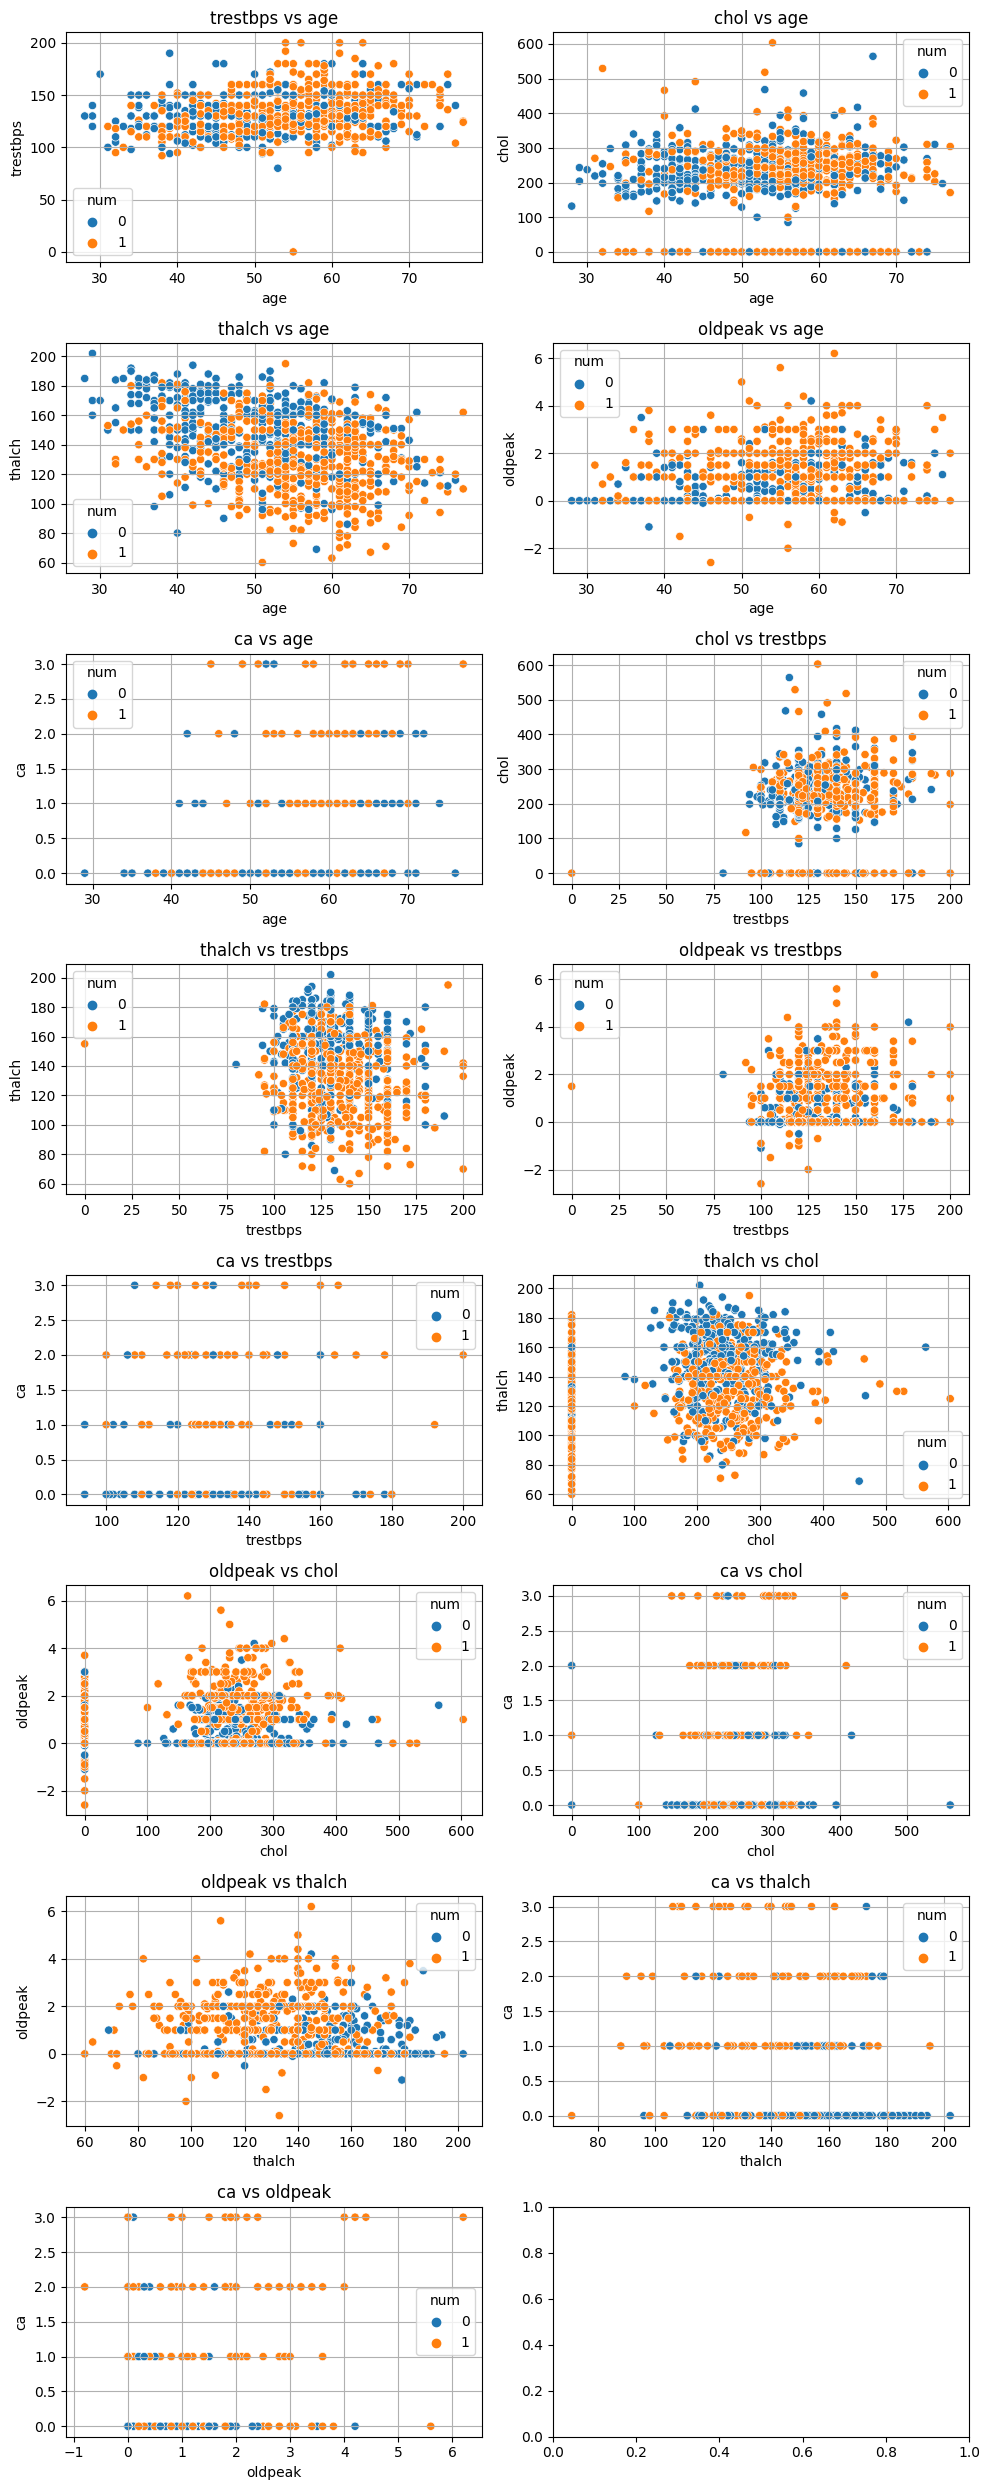

In [345]:
X_tmp_numeric = X_numeric.copy()
X_tmp_numeric.loc[X_tmp_numeric["num"] > 0, "num"] = 1
numeric_features = X_tmp_numeric.columns.values[:-1]
plt.rcdefaults()
sns.reset_defaults()
n = len(numeric_features)
valid_axes = [(i, j) for i in range(n-1) for j in range(i+1, n) if i != j and j > i]

num_rows = 8
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 25))

for idx, (i, j) in enumerate(valid_axes):
    if idx == 15:
        break
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    sns.scatterplot(data=X_tmp_numeric, x=numeric_features[i], y=numeric_features[j], hue="num", ax=ax)
    ax.grid(True)
    ax.set_title(f"{numeric_features[j]} vs {numeric_features[i]}")

plt.tight_layout()
plt.show()
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")
